In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Évite les fuites de mémoire sur Windows
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go
import seaborn as sns
from thefuzz import fuzz, process
from fuzzywuzzy import process

In [2]:
dispo = pd.read_csv("DisponibiliteAlimentaire_2017.csv",sep=",")
pop = pd.read_csv("Population_2000_2018.csv",sep=",")
abord = pd.read_csv("Cout et abordabilité.csv",sep=",")
dist = pd.read_excel("Distance.xlsx")
dtf = pd.read_excel("DTF.xlsx")
kfc = pd.read_excel("KFC.xlsx")
pib = pd.read_excel("PIB.xlsx", header=3)
elec = pd.read_csv("Electricité.csv",sep=",", header=5)
stabpol = pd.read_excel("Stab Pol.xlsx")
trad = pd.read_excel("traduction anglais français.xlsx")


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Disponibilité Alimentaire</h3>
</div>

In [3]:
dispo.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
dispo.shape

(176600, 14)

In [5]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [6]:
dispo.isna().mean()

Code Domaine              0.0
Domaine                   0.0
Code zone                 0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64

In [7]:
dispo.duplicated().sum()

0

In [8]:
dispo.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Population</h3>
</div>

In [9]:
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [10]:
pop.shape

(4411, 15)

In [11]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [12]:
pop.isna().mean()

Code Domaine              0.00000
Domaine                   0.00000
Code zone                 0.00000
Zone                      0.00000
Code Élément              0.00000
Élément                   0.00000
Code Produit              0.00000
Produit                   0.00000
Code année                0.00000
Année                     0.00000
Unité                     0.00000
Valeur                    0.00000
Symbole                   0.00000
Description du Symbole    0.00000
Note                      0.94151
dtype: float64

In [13]:
pop.duplicated().sum()

0

In [14]:
pop.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

In [15]:
print(pop['Note'].unique())

[nan
 'UNDESA, Population Division – World Population Prospects, the 2017 Revision']


In [16]:
pop = pop[pop['Année'] == 2017]

In [17]:
pop = pop[['Code zone','Zone','Unité','Valeur','Symbole','Description du Symbole']]
pop

,Code zone,Zone,Unité,Valeur,Symbole,Description du Symbole
17,2,Afghanistan,1000 personnes,36296.113,X,Sources internationales sûres
36,202,Afrique du Sud,1000 personnes,57009.756,X,Sources internationales sûres
55,3,Albanie,1000 personnes,2884.169,X,Sources internationales sûres
74,4,Algérie,1000 personnes,41389.189,X,Sources internationales sûres
93,79,Allemagne,1000 personnes,82658.409,X,Sources internationales sûres
...,...,...,...,...,...,...
4333,236,Venezuela (République bolivarienne du),1000 personnes,29402.484,X,Sources internationales sûres
4352,237,Viet Nam,1000 personnes,94600.648,X,Sources internationales sûres
4371,249,Yémen,1000 personnes,27834.819,X,Sources internationales sûres
4390,251,Zambie,1000 personnes,16853.599,X,Sources internationales sûres


In [18]:
print(pop['Unité'].unique())

['1000 personnes']


In [19]:
pop['Valeur'] = pop['Valeur'] /1000
pop = pop[['Zone', 'Valeur']]

In [20]:
pop = pop.rename(columns={'Valeur': 'Population en M'})
pop

,Zone,Population en M
17,Afghanistan,36.296113
36,Afrique du Sud,57.009756
55,Albanie,2.884169
74,Algérie,41.389189
93,Allemagne,82.658409
...,...,...
4333,Venezuela (République bolivarienne du),29.402484
4352,Viet Nam,94.600648
4371,Yémen,27.834819
4390,Zambie,16.853599


In [21]:
doubpop = pop['Zone'][pop['Zone'].duplicated()]
doubpop

Series([], Name: Zone, dtype: object)

In [22]:
pop

,Zone,Population en M
17,Afghanistan,36.296113
36,Afrique du Sud,57.009756
55,Albanie,2.884169
74,Algérie,41.389189
93,Allemagne,82.658409
...,...,...
4333,Venezuela (République bolivarienne du),29.402484
4352,Viet Nam,94.600648
4371,Yémen,27.834819
4390,Zambie,16.853599


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Disponibilité Alimentaire</h3>
</div>

In [23]:
print(dispo['Produit'].unique())

['Blé et produits' 'Riz et produits' 'Orge et produits' 'Maïs et produits'
 'Seigle et produits' 'Avoine' 'Millet et produits' 'Sorgho et produits'
 'Céréales, Autres' 'Pommes de Terre et produits' 'Ignames' 'Racines nda'
 'Sucre, canne' 'Sucre, betterave' 'Sucre Eq Brut' 'Edulcorants Autres'
 'Miel' 'Haricots' 'Pois' 'Légumineuses Autres et produits'
 'Noix et produits' 'Soja' 'Arachides Decortiquees' 'Graines de tournesol'
 'Graines Colza/Moutarde' 'Graines de coton' 'Coco (Incl Coprah)' 'Sésame'
 'Olives' 'Plantes Oleiferes, Autre' 'Huile de Soja' "Huile d'Arachide"
 'Huile de Tournesol' 'Huile de Colza&Moutarde' 'Huile Graines de Coton'
 'Huile de Palmistes' 'Huile de Palme' 'Huile de Coco' 'Huile de Sésame'
 "Huile d'Olive" 'Huile de Son de Riz' 'Huile de Germe de Maïs'
 'Huil Plantes Oleif Autr' 'Tomates et produits' 'Oignons'
 'Légumes, Autres' 'Oranges, Mandarines' 'Citrons & Limes et produits'
 'Pamplemousse et produits' 'Agrumes, Autres' 'Bananes'
 'Pommes et produits' 'Anana

In [24]:
print(dispo['Élément'].unique())

['Production' 'Importations - Quantité' 'Variation de stock'
 'Exportations - Quantité' 'Disponibilité intérieure'
 'Aliments pour animaux' 'Semences' 'Pertes' 'Résidus' 'Nourriture'
 'Disponibilité alimentaire en quantité (kg/personne/an)'
 'Disponibilité alimentaire (Kcal/personne/jour)'
 'Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de matière grasse en quantité (g/personne/jour)'
 'Traitement' 'Autres utilisations (non alimentaire)'
 'Alimentation pour touristes']


In [25]:
print(dispo['Unité'].unique())

['Milliers de tonnes' 'kg' 'Kcal/personne/jour' 'g/personne/jour']


In [26]:
dispo = dispo[dispo['Produit'] == 'Viande de Volailles']
dispo.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [27]:
dispo = dispo[dispo['Élément'].isin(['Production', 'Importations - Quantité', 
                            'Exportations - Quantité', 
                            'Disponibilité alimentaire en quantité (kg/personne/an)'])]
dispo = dispo.pivot(index=['Zone', 'Produit', 'Année'], 
                    columns='Élément', 
                    values='Valeur')
dispo.head()

,,Élément,Disponibilité alimentaire en quantité (kg/personne/an),Exportations - Quantité,Importations - Quantité,Production
Zone,Produit,Année,,,,
Afghanistan,Viande de Volailles,2017,1.53,NaN,29.0,28.0
Afrique du Sud,Viande de Volailles,2017,35.69,63.0,514.0,1667.0
Albanie,Viande de Volailles,2017,16.36,0.0,38.0,13.0
Algérie,Viande de Volailles,2017,6.38,0.0,2.0,275.0
Allemagne,Viande de Volailles,2017,19.47,646.0,842.0,1514.0


In [28]:
dispo = dispo.rename(columns={
    'Disponibilité alimentaire en quantité (kg/personne/an)': 'dispo alim (kg/pers/an)',
    'Exportations - Quantité': 'Exportation (mT)',
    'Importations - Quantité': 'Importation (mT)',
    'Production': 'Production (mT)'
})
dispo

,,Élément,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT)
Zone,Produit,Année,,,,
Afghanistan,Viande de Volailles,2017,1.53,NaN,29.0,28.0
Afrique du Sud,Viande de Volailles,2017,35.69,63.0,514.0,1667.0
Albanie,Viande de Volailles,2017,16.36,0.0,38.0,13.0
Algérie,Viande de Volailles,2017,6.38,0.0,2.0,275.0
Allemagne,Viande de Volailles,2017,19.47,646.0,842.0,1514.0
...,...,...,...,...,...,...
Émirats arabes unis,Viande de Volailles,2017,43.47,94.0,433.0,48.0
Équateur,Viande de Volailles,2017,19.31,0.0,0.0,340.0
États-Unis d'Amérique,Viande de Volailles,2017,55.68,3692.0,123.0,21914.0


In [29]:
dispo = dispo.reset_index()
dispo = dispo.drop(columns=['Produit','Année'])
dispo

Élément,Zone,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT)
0,Afghanistan,1.53,NaN,29.0,28.0
1,Afrique du Sud,35.69,63.0,514.0,1667.0
2,Albanie,16.36,0.0,38.0,13.0
3,Algérie,6.38,0.0,2.0,275.0
4,Allemagne,19.47,646.0,842.0,1514.0
...,...,...,...,...,...
167,Émirats arabes unis,43.47,94.0,433.0,48.0
168,Équateur,19.31,0.0,0.0,340.0
169,États-Unis d'Amérique,55.68,3692.0,123.0,21914.0
170,Éthiopie,0.13,NaN,1.0,14.0


In [30]:
doubdispo = dispo['Zone'][dispo['Zone'].duplicated()]
print(doubdispo)

Series([], Name: Zone, dtype: object)


In [31]:
def find_best_match(row, choices, scorer=fuzz.ratio, seuil=80):
    best_match = process.extractOne(row, choices, scorer=scorer)
    return best_match[0] if best_match and best_match[1] >= seuil else None

pop['Zone'] = pop['Zone'].apply(lambda x: find_best_match(x, dispo['Zone'].unique()))
df = pop.merge(dispo, on='Zone', how='left')
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT)
0,Afghanistan,36.296113,1.53,NaN,29.0,28.0
1,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0
2,Albanie,2.884169,16.36,0.0,38.0,13.0
3,Algérie,41.389189,6.38,0.0,2.0,275.0
4,Allemagne,82.658409,19.47,646.0,842.0,1514.0
...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),29.402484,20.28,0.0,25.0,600.0
232,Viet Nam,94.600648,12.33,1.0,291.0,918.0
233,Yémen,27.834819,8.53,0.0,78.0,168.0
234,Zambie,16.853599,3.42,1.0,12.0,49.0


In [32]:
print("\nNombre de valeurs manquantes par colonne:")
print(df.isnull().sum())


Nombre de valeurs manquantes par colonne:
Zone                        64
Population en M              0
dispo alim (kg/pers/an)     64
Exportation (mT)           101
Importation (mT)            66
Production (mT)             68
dtype: int64


In [33]:
df['Exportation (mT)'] = df['Exportation (mT)'].fillna(0)
df['Importation (mT)'] = df['Importation (mT)'].fillna(0)
df['Production (mT)'] = df['Production (mT)'].fillna(0)
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT)
0,Afghanistan,36.296113,1.53,0.0,29.0,28.0
1,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0
2,Albanie,2.884169,16.36,0.0,38.0,13.0
3,Algérie,41.389189,6.38,0.0,2.0,275.0
4,Allemagne,82.658409,19.47,646.0,842.0,1514.0
...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),29.402484,20.28,0.0,25.0,600.0
232,Viet Nam,94.600648,12.33,1.0,291.0,918.0
233,Yémen,27.834819,8.53,0.0,78.0,168.0
234,Zambie,16.853599,3.42,1.0,12.0,49.0


In [34]:
print("\nNombre de valeurs manquantes par colonne:")
print(df.isnull().sum())


Nombre de valeurs manquantes par colonne:
Zone                       64
Population en M             0
dispo alim (kg/pers/an)    64
Exportation (mT)            0
Importation (mT)            0
Production (mT)             0
dtype: int64


In [35]:
df = df.dropna(subset=['dispo alim (kg/pers/an)'])
print("\nNombre de valeurs manquantes par colonne:")
print(df.isnull().sum())


Nombre de valeurs manquantes par colonne:
Zone                       0
Population en M            0
dispo alim (kg/pers/an)    0
Exportation (mT)           0
Importation (mT)           0
Production (mT)            0
dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Abordabilité alimentaire</h3>
</div>

In [36]:
abord.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Édition,Unité,Valeur,Symbole,Description du Symbole
0,CAHD,Coût et abordabilité d’une alimentation saine\...,4,Afghanistan,6132,Valeur,7006,Number of people unable to afford a healthy di...,2017,2017,Décembre 2024 (Mise à jour),millions de No,NaN,O,Valeur manquante
1,CAHD,Coût et abordabilité d’une alimentation saine\...,710,Afrique du Sud,6132,Valeur,7006,Number of people unable to afford a healthy di...,2017,2017,Décembre 2024 (Mise à jour),millions de No,35.2,E,Valeur estimée
2,CAHD,Coût et abordabilité d’une alimentation saine\...,8,Albanie,6132,Valeur,7006,Number of people unable to afford a healthy di...,2017,2017,Décembre 2024 (Mise à jour),millions de No,0.7,E,Valeur estimée
3,CAHD,Coût et abordabilité d’une alimentation saine\...,12,Algérie,6132,Valeur,7006,Number of people unable to afford a healthy di...,2017,2017,Décembre 2024 (Mise à jour),millions de No,7.7,E,Valeur estimée
4,CAHD,Coût et abordabilité d’une alimentation saine\...,276,Allemagne,6132,Valeur,7006,Number of people unable to afford a healthy di...,2017,2017,Décembre 2024 (Mise à jour),millions de No,2.3,E,Valeur estimée


In [37]:
abord.shape

(203, 15)

In [38]:
abord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code Domaine            203 non-null    object
 1   Domaine                 203 non-null    object
 2   Code zone (M49)         203 non-null    int64 
 3   Zone                    203 non-null    object
 4   Code Élément            203 non-null    int64 
 5   Élément                 203 non-null    object
 6   Code Produit            203 non-null    int64 
 7   Produit                 203 non-null    object
 8   Code année              203 non-null    int64 
 9   Année                   203 non-null    int64 
 10  Édition                 203 non-null    object
 11  Unité                   203 non-null    object
 12  Valeur                  150 non-null    object
 13  Symbole                 203 non-null    object
 14  Description du Symbole  203 non-null    object
dtypes: int

In [39]:
abord.isna().mean()

Code Domaine              0.000000
Domaine                   0.000000
Code zone (M49)           0.000000
Zone                      0.000000
Code Élément              0.000000
Élément                   0.000000
Code Produit              0.000000
Produit                   0.000000
Code année                0.000000
Année                     0.000000
Édition                   0.000000
Unité                     0.000000
Valeur                    0.261084
Symbole                   0.000000
Description du Symbole    0.000000
dtype: float64

In [40]:
abord.duplicated().sum()

0

In [41]:
abord.nunique()

Code Domaine                1
Domaine                     1
Code zone (M49)           203
Zone                      203
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Édition                     1
Unité                       1
Valeur                     82
Symbole                     2
Description du Symbole      2
dtype: int64

In [42]:
print("\nNombre de valeurs manquantes par colonne:")
print(abord.isnull().sum())


Nombre de valeurs manquantes par colonne:
Code Domaine               0
Domaine                    0
Code zone (M49)            0
Zone                       0
Code Élément               0
Élément                    0
Code Produit               0
Produit                    0
Code année                 0
Année                      0
Édition                    0
Unité                      0
Valeur                    53
Symbole                    0
Description du Symbole     0
dtype: int64


In [43]:
abord1 = abord[abord['Description du Symbole'] == 'Valeur manquante']
abord1 = abord1['Zone']
abord1

0                                     Afghanistan
5                                         Andorre
7                              Antigua-et-Barbuda
8                                 Arabie saoudite
14                                        Bahamas
15                                        Bahreïn
17                                        Barbade
22                                       Bermudes
28                              Brunéi Darussalam
33                                       Cambodge
37                       Chine - RAS de Hong-Kong
38                           Chine - RAS de Macao
48                                           Cuba
51                                      Dominique
53                                    El Salvador
56                                       Érythrée
68                                        Géorgie
72                                      Groenland
75                             Guinée équatoriale
81                                      Îles Cook


In [44]:
print(abord['Unité'].unique())

['millions de No']


In [45]:
print(abord['Produit'].unique())

['Number of people unable to afford a healthy diet (NUA), million']


In [46]:
print(abord['Domaine'].unique())

['Coût et abordabilité d’une alimentation saine\r\n (CoAHD)']


In [47]:
abord = abord[['Zone', 'Valeur']]
abord = abord.rename(columns={'Valeur': 'Abordabilité alimentaire en M'})
abord

,Zone,Abordabilité alimentaire en M
0,Afghanistan,NaN
1,Afrique du Sud,35.2
2,Albanie,0.7
3,Algérie,7.7
4,Allemagne,2.3
...,...,...
198,Venezuela (République bolivarienne du),NaN
199,Viet Nam,10.6
200,Yémen,NaN
201,Zambie,13.6


In [48]:
doubabord = abord['Zone'][abord['Zone'].duplicated()]
print(doubabord)

Series([], Name: Zone, dtype: object)


In [49]:
def find_best_match(row, choices, scorer=fuzz.ratio, seuil=80):
    if pd.isna(row):  # Gérer les valeurs NaN/None
        return None
    best_match = process.extractOne(str(row), choices, scorer=scorer)  # Convertir en string
    return best_match[0] if best_match and best_match[1] >= seuil else None

# Appliquer le matching et faire la jointure
pop['Zone'] = pop['Zone'].apply(lambda x: find_best_match(x, abord['Zone'].unique()))
df = df.merge(abord, on='Zone', how='left')

In [50]:
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),Abordabilité alimentaire en M
0,Afghanistan,36.296113,1.53,0.0,29.0,28.0,NaN
1,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,35.2
2,Albanie,2.884169,16.36,0.0,38.0,13.0,0.7
3,Algérie,41.389189,6.38,0.0,2.0,275.0,7.7
4,Allemagne,82.658409,19.47,646.0,842.0,1514.0,2.3
...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),29.402484,20.28,0.0,25.0,600.0,NaN
168,Viet Nam,94.600648,12.33,1.0,291.0,918.0,10.6
169,Yémen,27.834819,8.53,0.0,78.0,168.0,NaN
170,Zambie,16.853599,3.42,1.0,12.0,49.0,13.6


In [51]:
df = df.dropna(subset=['Abordabilité alimentaire en M'])
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),Abordabilité alimentaire en M
1,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,35.2
2,Albanie,2.884169,16.36,0.0,38.0,13.0,0.7
3,Algérie,41.389189,6.38,0.0,2.0,275.0,7.7
4,Allemagne,82.658409,19.47,646.0,842.0,1514.0,2.3
5,Angola,29.816766,10.56,0.0,277.0,42.0,19
...,...,...,...,...,...,...,...
163,Turquie,81.116450,20.64,429.0,3.0,2192.0,9.7
165,Uruguay,3.436641,9.12,3.0,3.0,33.0,1.1
168,Viet Nam,94.600648,12.33,1.0,291.0,918.0,10.6
170,Zambie,16.853599,3.42,1.0,12.0,49.0,13.6


In [52]:
df = df.copy()
df['Abordabilité alimentaire en M'] = pd.to_numeric(df['Abordabilité alimentaire en M'], errors='coerce')
df['Population en M'] = pd.to_numeric(df['Population en M'], errors='coerce')

In [53]:
df['% pouvant manger'] = (1 - (df['Abordabilité alimentaire en M'] / df['Population en M'])) * 100
df['% pouvant manger'] = df['% pouvant manger'].round(1)
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),Abordabilité alimentaire en M,% pouvant manger
1,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,35.2,38.3
2,Albanie,2.884169,16.36,0.0,38.0,13.0,0.7,75.7
3,Algérie,41.389189,6.38,0.0,2.0,275.0,7.7,81.4
4,Allemagne,82.658409,19.47,646.0,842.0,1514.0,2.3,97.2
5,Angola,29.816766,10.56,0.0,277.0,42.0,19.0,36.3
...,...,...,...,...,...,...,...,...
163,Turquie,81.116450,20.64,429.0,3.0,2192.0,9.7,88.0
165,Uruguay,3.436641,9.12,3.0,3.0,33.0,1.1,68.0
168,Viet Nam,94.600648,12.33,1.0,291.0,918.0,10.6,88.8
170,Zambie,16.853599,3.42,1.0,12.0,49.0,13.6,19.3


In [54]:
df.drop('Abordabilité alimentaire en M', axis=1, inplace=True)

In [55]:
print("\nNombre de valeurs manquantes par colonne:")
print(df.isnull().sum())


Nombre de valeurs manquantes par colonne:
Zone                       0
Population en M            0
dispo alim (kg/pers/an)    0
Exportation (mT)           0
Importation (mT)           0
Production (mT)            0
% pouvant manger           7
dtype: int64


In [56]:
lignes_non_renseignees = df[df.isnull().any(axis=1)]
lignes_non_renseignees

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger
63,Grenade,0.110874,45.70,0.0,7.0,1.0,NaN
77,Islande,0.334393,29.95,0.0,2.0,10.0,NaN
90,Liban,6.819373,10.74,4.0,13.0,64.0,NaN
93,Luxembourg,0.591910,18.33,1.0,11.0,0.0,NaN
98,Maldives,0.496402,13.50,0.0,12.0,0.0,NaN
100,Malte,0.437933,27.17,0.0,9.0,4.0,NaN
139,Sainte-Lucie,0.180954,56.69,0.0,10.0,1.0,NaN


In [57]:
df = df.drop(lignes_non_renseignees.index)
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger
1,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,38.3
2,Albanie,2.884169,16.36,0.0,38.0,13.0,75.7
3,Algérie,41.389189,6.38,0.0,2.0,275.0,81.4
4,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2
5,Angola,29.816766,10.56,0.0,277.0,42.0,36.3
...,...,...,...,...,...,...,...
163,Turquie,81.116450,20.64,429.0,3.0,2192.0,88.0
165,Uruguay,3.436641,9.12,3.0,3.0,33.0,68.0
168,Viet Nam,94.600648,12.33,1.0,291.0,918.0,88.8
170,Zambie,16.853599,3.42,1.0,12.0,49.0,19.3


In [58]:
print("\nNombre de valeurs manquantes par colonne:")
print(df.isnull().sum())


Nombre de valeurs manquantes par colonne:
Zone                       0
Population en M            0
dispo alim (kg/pers/an)    0
Exportation (mT)           0
Importation (mT)           0
Production (mT)            0
% pouvant manger           0
dtype: int64


In [59]:
print(df['Zone'].unique())

['Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Angola' 'Argentine'
 'Arménie' 'Australie' 'Autriche' 'Azerbaïdjan' 'Bangladesh' 'Bélarus'
 'Belgique' 'Belize' 'Bénin' 'Bolivie (État plurinational de)'
 'Bosnie-Herzégovine' 'Botswana' 'Brésil' 'Bulgarie' 'Burkina Faso'
 'Cabo Verde' 'Cameroun' 'Canada' 'Chili' 'Chine, continentale'
 'Chine, Taiwan Province de' 'Chypre' 'Colombie' 'Congo' 'Costa Rica'
 "Côte d'Ivoire" 'Croatie' 'Danemark' 'Djibouti' 'Égypte'
 'Émirats arabes unis' 'Équateur' 'Espagne' 'Estonie' 'Eswatini'
 "États-Unis d'Amérique" 'Éthiopie' 'Fédération de Russie' 'Fidji'
 'Finlande' 'France' 'Gabon' 'Gambie' 'Ghana' 'Grèce' 'Guatemala' 'Guinée'
 'Guinée-Bissau' 'Guyana' 'Haïti' 'Honduras' 'Hongrie' 'Inde' 'Indonésie'
 "Iran (République islamique d')" 'Iraq' 'Irlande' 'Israël' 'Italie'
 'Jamaïque' 'Japon' 'Jordanie' 'Kazakhstan' 'Kenya' 'Kirghizistan'
 'Lesotho' 'Lettonie' 'Libéria' 'Lituanie' 'Macédoine du Nord'
 'Madagascar' 'Malaisie' 'Malawi' 'Mali' 'Maroc' 'Mauri

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">DTF</h3>
</div>

In [60]:
dtf.head()

,Unnamed: 0,Economy,DB 2019,DB 2020
0,NaN,Afghanistan,44.2,44.1
1,NaN,Afrique du Sud,66.7,67.0
2,NaN,Albanie,67.0,67.7
3,NaN,Algérie,48.5,48.6
4,NaN,Allemagne,79.3,79.7


In [61]:
dtf.shape

(213, 4)

In [62]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Economy     213 non-null    object 
 2   DB 2019     213 non-null    float64
 3   DB 2020     213 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


In [63]:
dtf['Evolution DTF(%)'] = ((dtf['DB 2020'] - dtf['DB 2019']) / dtf['DB 2019']) * 100
dtf

,Unnamed: 0,Economy,DB 2019,DB 2020,Evolution DTF(%)
0,NaN,Afghanistan,44.2,44.1,-0.226244
1,NaN,Afrique du Sud,66.7,67.0,0.449775
2,NaN,Albanie,67.0,67.7,1.044776
3,NaN,Algérie,48.5,48.6,0.206186
4,NaN,Allemagne,79.3,79.7,0.504414
...,...,...,...,...,...
208,NaN,"Venezuela, RB",32.1,30.2,-5.919003
209,NaN,Viet Nam,68.6,69.8,1.749271
210,NaN,"Yémen, République du",30.7,31.8,3.583062
211,NaN,Zambie,65.7,66.9,1.826484


In [64]:
dtf = dtf[['Economy','DB 2020']]
dtf.head()

,Economy,DB 2020
0,Afghanistan,44.1
1,Afrique du Sud,67.0
2,Albanie,67.7
3,Algérie,48.6
4,Allemagne,79.7


In [65]:
dtf = dtf.rename(columns={'Economy': 'Zone'})
dtf.head()

,Zone,DB 2020
0,Afghanistan,44.1
1,Afrique du Sud,67.0
2,Albanie,67.7
3,Algérie,48.6
4,Allemagne,79.7


In [66]:
def find_best_match(row, choices, scorer=fuzz.ratio, seuil=80):
    if pd.isna(row):  # Gérer les valeurs NaN/None
        return None
    best_match = process.extractOne(str(row), choices, scorer=scorer)  # Convertir en string
    return best_match[0] if best_match and best_match[1] >= seuil else None

pop['Zone'] = pop['Zone'].apply(lambda x: find_best_match(x, dtf['Zone'].unique()))
df = df.merge(dtf, on='Zone', how='left')

In [67]:
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020
0,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,38.3,67.0
1,Albanie,2.884169,16.36,0.0,38.0,13.0,75.7,67.7
2,Algérie,41.389189,6.38,0.0,2.0,275.0,81.4,48.6
3,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2,79.7
4,Angola,29.816766,10.56,0.0,277.0,42.0,36.3,41.3
...,...,...,...,...,...,...,...,...
130,Turquie,81.116450,20.64,429.0,3.0,2192.0,88.0,76.8
131,Uruguay,3.436641,9.12,3.0,3.0,33.0,68.0,61.5
132,Viet Nam,94.600648,12.33,1.0,291.0,918.0,88.8,69.8
133,Zambie,16.853599,3.42,1.0,12.0,49.0,19.3,66.9


In [68]:
lignes_non_renseignees = df[df.isnull().any(axis=1)]
lignes_non_renseignees

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020
26,"Chine, Taiwan Province de",23.674546,33.17,8.0,161.0,652.0,94.1,NaN
54,Guyana,0.775222,38.34,0.0,0.0,31.0,61.3,NaN
112,Sao Tomé-et-Principe,0.207089,9.47,0.0,2.0,1.0,51.7,NaN


In [69]:
print("\nNombre de valeurs manquantes par colonne:")
print(df.isnull().sum())


Nombre de valeurs manquantes par colonne:
Zone                       0
Population en M            0
dispo alim (kg/pers/an)    0
Exportation (mT)           0
Importation (mT)           0
Production (mT)            0
% pouvant manger           0
DB 2020                    3
dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Stabilité Politique</h3>
</div>

In [70]:
stabpol

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2,4.301075,0,27.419355
1,ALBcc1996,ALB,Albania,1996,cc,-0.893903,0.315914,3,19.354839,2.688172,43.010754
2,DZAcc1996,DZA,Algeria,1996,cc,-0.566741,0.262077,4,33.333332,16.666666,52.688171
3,ASMcc1996,ASM,American Samoa,1996,cc,..,..,..,..,..,..
4,ADOcc1996,ADO,Andorra,1996,cc,1.318143,0.480889,1,87.096771,72.043015,96.774193
...,...,...,...,...,...,...,...,...,...,...,...
32095,VIRva2023,VIR,Virgin Islands (U.S.),2023,va,..,..,..,..,..,..
32096,WBGva2023,WBG,West Bank and Gaza,2023,va,-1.118067,0.149837,6,18.137255,11.764706,24.509804
32097,YEMva2023,YEM,"Yemen, Rep.",2023,va,-1.550217,0.131432,8,6.372549,2.45098,11.764706
32098,ZMBva2023,ZMB,Zambia,2023,va,-0.047946,0.118482,12,45.098038,39.215687,52.450981


In [71]:
stabpol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32100 entries, 0 to 32099
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   codeindyr     32100 non-null  object
 1   code          32100 non-null  object
 2   countryname   32100 non-null  object
 3   year          32100 non-null  int64 
 4   indicator     32100 non-null  object
 5   estimate      32100 non-null  object
 6   stddev        32100 non-null  object
 7   nsource       32100 non-null  object
 8   pctrank       32100 non-null  object
 9   pctranklower  32100 non-null  object
 10  pctrankupper  32100 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB


In [72]:
stabpol = stabpol[stabpol['indicator'] == 'pv']
stabpol = stabpol[stabpol['year'] == 2017]
stabpol

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
23540,AFGpv2017,AFG,Afghanistan,2017,pv,-2.794976,0.225672,6,0.47619,0,1.428571
23541,ALBpv2017,ALB,Albania,2017,pv,0.373771,0.213936,8,59.523811,46.666668,70.476189
23542,DZApv2017,DZA,Algeria,2017,pv,-0.919614,0.219212,7,15.714286,9.523809,27.142857
23543,ASMpv2017,ASM,American Samoa,2017,pv,1.184324,0.344771,1,91.904762,66.666664,99.523811
23544,ADOpv2017,ADO,Andorra,2017,pv,1.39289,0.309248,2,97.14286,77.619049,99.523811
...,...,...,...,...,...,...,...,...,...,...,...
23749,VIRpv2017,VIR,Virgin Islands (U.S.),2017,pv,0.981491,0.284397,2,82.85714,64.285713,97.619049
23750,WBGpv2017,WBG,West Bank and Gaza,2017,pv,-1.650646,0.237187,4,8.095238,3.809524,9.523809
23751,YEMpv2017,YEM,"Yemen, Rep.",2017,pv,-2.934317,0.22367,6,0,0,0.952381
23752,ZMBpv2017,ZMB,Zambia,2017,pv,0.142043,0.218073,7,52.380951,38.57143,63.809525


In [73]:
trad = trad[['Code alpha-3','Nom en français du pays ou territoire']]
trad = trad.rename(columns={'Code alpha-3': 'code'})
trad

,code,Nom en français du pays ou territoire
0,AFG,Afghanistan
1,ZAF,Afrique du Sud
2,ALA,Îles Åland
3,ALB,Albanie
4,DZA,Algérie
...,...,...
244,VNM,Viet Nam
245,WLF,Wallis-et-Futuna
246,YEM,Yémen
247,ZMB,Zambie


In [74]:
stabpol = pd.merge(stabpol, trad, on='code', how='left')
stabpol.head()

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper,Nom en français du pays ou territoire
0,AFGpv2017,AFG,Afghanistan,2017,pv,-2.794976,0.225672,6,0.47619,0,1.428571,Afghanistan
1,ALBpv2017,ALB,Albania,2017,pv,0.373771,0.213936,8,59.523811,46.666668,70.476189,Albanie
2,DZApv2017,DZA,Algeria,2017,pv,-0.919614,0.219212,7,15.714286,9.523809,27.142857,Algérie
3,ASMpv2017,ASM,American Samoa,2017,pv,1.184324,0.344771,1,91.904762,66.666664,99.523811,Samoa américaines
4,ADOpv2017,ADO,Andorra,2017,pv,1.39289,0.309248,2,97.14286,77.619049,99.523811,NaN


In [75]:
print("\nNombre de valeurs manquantes par colonne:")
print(stabpol.isnull().sum())


Nombre de valeurs manquantes par colonne:
codeindyr                                0
code                                     0
countryname                              0
year                                     0
indicator                                0
estimate                                 0
stddev                                   0
nsource                                  0
pctrank                                  0
pctranklower                             0
pctrankupper                             0
Nom en français du pays ou territoire    6
dtype: int64


In [76]:
lnr = stabpol[stabpol.isnull().any(axis=1)]
lnr

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper,Nom en français du pays ou territoire
4,ADOpv2017,ADO,Andorra,2017,pv,1.39289,0.309248,2,97.14286,77.619049,99.523811,NaN
44,COGpv2017,COG,"Congo, Rep.",2017,pv,-0.533615,0.222478,6,27.619047,16.190475,39.523811,NaN
102,KSVpv2017,KSV,Kosovo,2017,pv,-0.244493,0.237187,4,38.095238,24.285715,52.380951,NaN
138,ANTpv2017,ANT,Netherlands Antilles (former),2017,pv,..,..,..,..,..,..,NaN
191,TMPpv2017,TMP,Timor-Leste,2017,pv,0.066383,0.237187,4,49.047619,32.380951,62.857143,NaN
210,WBGpv2017,WBG,West Bank and Gaza,2017,pv,-1.650646,0.237187,4,8.095238,3.809524,9.523809,NaN


In [77]:
stabpol = stabpol[['Nom en français du pays ou territoire','estimate']]
stabpol = stabpol.rename(columns={'Nom en français du pays ou territoire': 'Zone','estimate':'Stabilité Politique'})
stabpol

,Zone,Stabilité Politique
0,Afghanistan,-2.794976
1,Albanie,0.373771
2,Algérie,-0.919614
3,Samoa américaines,1.184324
4,NaN,1.39289
...,...,...
209,Îles Vierges des États-Unis,0.981491
210,NaN,-1.650646
211,Yémen,-2.934317
212,Zambie,0.142043


In [78]:
stabpol['Zone'] = stabpol['Zone'].astype(str)

In [79]:
def find_best_match(row, choices, scorer=fuzz.ratio, seuil=90):
    if pd.isna(row):  # Gérer les valeurs NaN/None
        return None
    best_match = process.extractOne(str(row), choices, scorer=scorer)  # Convertir en string
    return best_match[0] if best_match and best_match[1] >= seuil else None

pop['Zone'] = pop['Zone'].apply(lambda x: find_best_match(x, stabpol['Zone'].unique()))
df = df.merge(stabpol, on='Zone', how='left')

In [80]:
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique
0,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,38.3,67.0,-0.284804
1,Albanie,2.884169,16.36,0.0,38.0,13.0,75.7,67.7,0.373771
2,Algérie,41.389189,6.38,0.0,2.0,275.0,81.4,48.6,-0.919614
3,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2,79.7,0.574381
4,Angola,29.816766,10.56,0.0,277.0,42.0,36.3,41.3,-0.387895
...,...,...,...,...,...,...,...,...,...
130,Turquie,81.116450,20.64,429.0,3.0,2192.0,88.0,76.8,-1.786376
131,Uruguay,3.436641,9.12,3.0,3.0,33.0,68.0,61.5,1.040092
132,Viet Nam,94.600648,12.33,1.0,291.0,918.0,88.8,69.8,0.211102
133,Zambie,16.853599,3.42,1.0,12.0,49.0,19.3,66.9,0.142043


In [81]:
print("\nNombre de valeurs manquantes par colonne:")
print(df.isnull().sum())


Nombre de valeurs manquantes par colonne:
Zone                       0
Population en M            0
dispo alim (kg/pers/an)    0
Exportation (mT)           0
Importation (mT)           0
Production (mT)            0
% pouvant manger           0
DB 2020                    3
Stabilité Politique        7
dtype: int64


In [82]:
lignes_non_renseignees = df[df.isnull().any(axis=1)]
lignes_non_renseignees

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique
11,Bélarus,9.450231,27.98,152.0,21.0,463.0,96.8,74.3,NaN
21,Cabo Verde,0.537498,17.62,0.0,12.0,1.0,62.8,55.0,NaN
26,"Chine, Taiwan Province de",23.674546,33.17,8.0,161.0,652.0,94.1,NaN,NaN
29,Congo,5.110695,21.53,0.0,104.0,7.0,21.7,36.2,NaN
54,Guyana,0.775222,38.34,0.0,0.0,31.0,61.3,NaN,-0.04944
73,Libéria,4.702226,10.67,0.0,48.0,15.0,34.1,43.2,NaN
105,République de Moldova,4.059684,16.14,0.0,16.0,54.0,90.1,74.4,NaN
106,République démocratique populaire lao,6.953035,10.91,0.0,0.0,0.0,39.6,50.8,NaN
112,Sao Tomé-et-Principe,0.207089,9.47,0.0,2.0,1.0,51.7,NaN,0.183462


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">PIB</h3>
</div>

In [83]:
pib

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26129.839062,27458.225331,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620
1,NaN,AFE,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,186.132432,186.947182,197.408105,225.447007,209.005786,226.883067,...,1656.107642,1479.564123,1329.777824,1520.171298,1538.924188,1493.780445,1344.080962,1522.590088,1628.024526,1659.515290
2,Afghanistan,AFG,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,625.054942,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,415.707417
3,NaN,AFW,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,121.938353,127.452629,133.825452,139.006714,148.547736,155.563837,...,2204.995700,1845.767804,1616.843198,1560.162999,1703.896392,1783.654365,1664.249176,1747.840549,1777.235012,1568.724310
4,Angola,AGO,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5005.999741,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2308.159767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3902.494244,3520.628507,3759.449591,4009.317993,4384.186241,4415.997161,4310.888247,5270.426702,5290.947472,5960.158205
262,"Yémen, Rép. du",YEM,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1430.164210,1362.173794,975.359407,811.165964,633.887206,623.376165,559.564673,522.173513,615.702079,477.409029
263,Afrique du Sud,ZAF,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,532.147504,545.657512,563.423009,604.536855,645.873376,684.621228,...,6856.731371,6112.273825,5651.205852,6618.335083,6914.178032,6533.711210,5580.603831,6843.399419,6523.410978,6022.542542
264,Zambie,ZMB,PIB par habitant ($ US courants),NY.GDP.PCAP.CD,221.559849,209.693206,202.281031,203.219451,229.979246,287.425476,...,1707.485731,1295.877887,1239.085279,1483.465773,1463.899979,1258.986198,951.644317,1127.160779,1447.123101,1330.727806


In [84]:
pib = pib[['Country Name','2017',]]
pib = pib.rename(columns={'Country Name':'Zone','2017':'PIB'})
pib['PIB'] = pib['PIB'].round(1)
pib.head()

,Zone,PIB
0,Aruba,28440.1
1,NaN,1520.2
2,Afghanistan,525.5
3,NaN,1560.2
4,Angola,2437.3


In [85]:
pib['Zone'] = pib['Zone'].astype(str)

In [86]:
def find_best_match(row, choices, scorer=fuzz.ratio, seuil=80):
    if pd.isna(row):  # Gérer les valeurs NaN/None
        return None
    best_match = process.extractOne(str(row), choices, scorer=scorer)  # Convertir en string
    return best_match[0] if best_match and best_match[1] >= seuil else None

pop['Zone'] = pop['Zone'].apply(lambda x: find_best_match(x, pib['Zone'].unique()))
df = df.merge(pib, on='Zone', how='left')

In [87]:
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB
0,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,38.3,67.0,-0.284804,6618.3
1,Albanie,2.884169,16.36,0.0,38.0,13.0,75.7,67.7,0.373771,4531.0
2,Algérie,41.389189,6.38,0.0,2.0,275.0,81.4,48.6,-0.919614,4554.7
3,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2,79.7,0.574381,45526.6
4,Angola,29.816766,10.56,0.0,277.0,42.0,36.3,41.3,-0.387895,2437.3
...,...,...,...,...,...,...,...,...,...,...
130,Turquie,81.116450,20.64,429.0,3.0,2192.0,88.0,76.8,-1.786376,10695.6
131,Uruguay,3.436641,9.12,3.0,3.0,33.0,68.0,61.5,1.040092,19184.7
132,Viet Nam,94.600648,12.33,1.0,291.0,918.0,88.8,69.8,0.211102,2956.1
133,Zambie,16.853599,3.42,1.0,12.0,49.0,19.3,66.9,0.142043,1483.5


In [88]:
print("\nNombre de valeurs manquantes par colonne:")
print(df.isnull().sum())


Nombre de valeurs manquantes par colonne:
Zone                       0
Population en M            0
dispo alim (kg/pers/an)    0
Exportation (mT)           0
Importation (mT)           0
Production (mT)            0
% pouvant manger           0
DB 2020                    3
Stabilité Politique        7
PIB                        7
dtype: int64


In [89]:
lignes_non_renseignees = df[df.isnull().any(axis=1)]
lignes_non_renseignees

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB
11,Bélarus,9.450231,27.98,152.0,21.0,463.0,96.8,74.3,NaN,5785.5
15,Bolivie (État plurinational de),11.192855,36.00,1.0,1.0,533.0,85.7,51.7,-0.280111,NaN
21,Cabo Verde,0.537498,17.62,0.0,12.0,1.0,62.8,55.0,NaN,3893.1
26,"Chine, Taiwan Province de",23.674546,33.17,8.0,161.0,652.0,94.1,NaN,NaN,NaN
29,Congo,5.110695,21.53,0.0,104.0,7.0,21.7,36.2,NaN,NaN
54,Guyana,0.775222,38.34,0.0,0.0,31.0,61.3,NaN,-0.04944,6178.7
60,Iran (République islamique d'),80.673883,27.52,45.0,6.0,2174.0,91.8,58.5,-0.933829,NaN
70,Kirghizistan,6.189733,3.10,0.0,25.0,7.0,59.6,67.8,-0.362506,NaN
73,Libéria,4.702226,10.67,0.0,48.0,15.0,34.1,43.2,NaN,699.3
105,République de Moldova,4.059684,16.14,0.0,16.0,54.0,90.1,74.4,NaN,NaN


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">KFC</h3>
</div>

In [90]:
kfc = kfc [['Pays','Restaurants']]
kfc = kfc.rename(columns={'Pays':'Zone','Restaurants':'KFC'})
kfc

,Zone,KFC
0,Afrique du Sud,955
1,Albanie,8
2,Algérie,2
3,Allemagne,189
4,Angola,9
...,...,...
102,Ukraine,48
103,Viet Nam,136
104,Yémen,1
105,Zambie,4


In [91]:
def find_best_match(row, choices, scorer=fuzz.ratio, seuil=80):
    if pd.isna(row):  # Gérer les valeurs NaN/None
        return None
    best_match = process.extractOne(str(row), choices, scorer=scorer)  # Convertir en string
    return best_match[0] if best_match and best_match[1] >= seuil else None

pop['Zone'] = pop['Zone'].apply(lambda x: find_best_match(x, kfc['Zone'].unique()))
df = df.merge(kfc, on='Zone', how='left')

In [92]:
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB,KFC
0,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,38.3,67.0,-0.284804,6618.3,955.0
1,Albanie,2.884169,16.36,0.0,38.0,13.0,75.7,67.7,0.373771,4531.0,8.0
2,Algérie,41.389189,6.38,0.0,2.0,275.0,81.4,48.6,-0.919614,4554.7,2.0
3,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2,79.7,0.574381,45526.6,189.0
4,Angola,29.816766,10.56,0.0,277.0,42.0,36.3,41.3,-0.387895,2437.3,9.0
...,...,...,...,...,...,...,...,...,...,...,...
130,Turquie,81.116450,20.64,429.0,3.0,2192.0,88.0,76.8,-1.786376,10695.6,142.0
131,Uruguay,3.436641,9.12,3.0,3.0,33.0,68.0,61.5,1.040092,19184.7,NaN
132,Viet Nam,94.600648,12.33,1.0,291.0,918.0,88.8,69.8,0.211102,2956.1,136.0
133,Zambie,16.853599,3.42,1.0,12.0,49.0,19.3,66.9,0.142043,1483.5,4.0


In [93]:
print("\nNombre de valeurs manquantes par colonne:")
print(df.isnull().sum())


Nombre de valeurs manquantes par colonne:
Zone                        0
Population en M             0
dispo alim (kg/pers/an)     0
Exportation (mT)            0
Importation (mT)            0
Production (mT)             0
% pouvant manger            0
DB 2020                     3
Stabilité Politique         7
PIB                         7
KFC                        52
dtype: int64


In [94]:
lignes_non_renseignees = df[df.isnull().any(axis=1)]
lignes_non_renseignees

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB,KFC
5,Argentine,43.937140,42.24,207.0,8.0,2161.0,91.4,59.0,0.162542,14532.5,NaN
11,Bélarus,9.450231,27.98,152.0,21.0,463.0,96.8,74.3,NaN,5785.5,19.0
13,Belize,0.375769,25.69,0.0,0.0,20.0,46.8,55.5,0.030404,6072.6,NaN
14,Bénin,11.175198,14.40,0.0,123.0,18.0,15.9,52.4,0.026252,1055.0,NaN
15,Bolivie (État plurinational de),11.192855,36.00,1.0,1.0,533.0,85.7,51.7,-0.280111,NaN,NaN
16,Bosnie-Herzégovine,3.351525,16.70,8.0,10.0,61.0,94.0,65.4,-0.35147,5345.0,NaN
18,Brésil,207.833823,48.03,4223.0,3.0,14201.0,73.0,59.1,-0.479948,10080.5,NaN
20,Burkina Faso,19.193234,2.27,0.0,0.0,46.0,32.8,51.4,-0.927886,709.1,NaN
21,Cabo Verde,0.537498,17.62,0.0,12.0,1.0,62.8,55.0,NaN,3893.1,NaN
22,Cameroun,24.566073,3.16,0.0,0.0,81.0,48.7,46.1,-1.091505,1496.1,NaN


In [95]:
df['KFC'] = df['KFC'].fillna(0)
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB,KFC
0,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,38.3,67.0,-0.284804,6618.3,955.0
1,Albanie,2.884169,16.36,0.0,38.0,13.0,75.7,67.7,0.373771,4531.0,8.0
2,Algérie,41.389189,6.38,0.0,2.0,275.0,81.4,48.6,-0.919614,4554.7,2.0
3,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2,79.7,0.574381,45526.6,189.0
4,Angola,29.816766,10.56,0.0,277.0,42.0,36.3,41.3,-0.387895,2437.3,9.0
...,...,...,...,...,...,...,...,...,...,...,...
130,Turquie,81.116450,20.64,429.0,3.0,2192.0,88.0,76.8,-1.786376,10695.6,142.0
131,Uruguay,3.436641,9.12,3.0,3.0,33.0,68.0,61.5,1.040092,19184.7,0.0
132,Viet Nam,94.600648,12.33,1.0,291.0,918.0,88.8,69.8,0.211102,2956.1,136.0
133,Zambie,16.853599,3.42,1.0,12.0,49.0,19.3,66.9,0.142043,1483.5,4.0


In [96]:
lignes_non_renseignees = df[df.isnull().any(axis=1)]
lignes_non_renseignees

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB,KFC
11,Bélarus,9.450231,27.98,152.0,21.0,463.0,96.8,74.3,NaN,5785.5,19.0
15,Bolivie (État plurinational de),11.192855,36.00,1.0,1.0,533.0,85.7,51.7,-0.280111,NaN,0.0
21,Cabo Verde,0.537498,17.62,0.0,12.0,1.0,62.8,55.0,NaN,3893.1,0.0
26,"Chine, Taiwan Province de",23.674546,33.17,8.0,161.0,652.0,94.1,NaN,NaN,NaN,0.0
29,Congo,5.110695,21.53,0.0,104.0,7.0,21.7,36.2,NaN,NaN,0.0
54,Guyana,0.775222,38.34,0.0,0.0,31.0,61.3,NaN,-0.04944,6178.7,0.0
60,Iran (République islamique d'),80.673883,27.52,45.0,6.0,2174.0,91.8,58.5,-0.933829,NaN,0.0
70,Kirghizistan,6.189733,3.10,0.0,25.0,7.0,59.6,67.8,-0.362506,NaN,4.0
73,Libéria,4.702226,10.67,0.0,48.0,15.0,34.1,43.2,NaN,699.3,0.0
105,République de Moldova,4.059684,16.14,0.0,16.0,54.0,90.1,74.4,NaN,NaN,0.0


In [97]:
df = df.drop(lignes_non_renseignees.index)
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB,KFC
0,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,38.3,67.0,-0.284804,6618.3,955.0
1,Albanie,2.884169,16.36,0.0,38.0,13.0,75.7,67.7,0.373771,4531.0,8.0
2,Algérie,41.389189,6.38,0.0,2.0,275.0,81.4,48.6,-0.919614,4554.7,2.0
3,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2,79.7,0.574381,45526.6,189.0
4,Angola,29.816766,10.56,0.0,277.0,42.0,36.3,41.3,-0.387895,2437.3,9.0
...,...,...,...,...,...,...,...,...,...,...,...
130,Turquie,81.116450,20.64,429.0,3.0,2192.0,88.0,76.8,-1.786376,10695.6,142.0
131,Uruguay,3.436641,9.12,3.0,3.0,33.0,68.0,61.5,1.040092,19184.7,0.0
132,Viet Nam,94.600648,12.33,1.0,291.0,918.0,88.8,69.8,0.211102,2956.1,136.0
133,Zambie,16.853599,3.42,1.0,12.0,49.0,19.3,66.9,0.142043,1483.5,4.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Distance avec la France</h3>
</div>

In [98]:
dist

,Pays,Distance km,Ville
0,Afghanistan,"5,572",Kaboul
1,Afrique du Sud,"8,665",Pretoria
2,Albanie,"1,599",Tirana
3,Algérie,"1,336",Alger
4,Allemagne,877,Berlin
...,...,...,...
205,Venezuela,"7,601",Caracas
206,Viet Nam,"9,178",Hanoï
207,Yémen,"5,300",Sanaa
208,Zambie,"7,575",Lusaka


In [99]:
dist = dist.rename(columns={'Pays':'Zone'})
dist = dist[['Zone', 'Distance km']]
dist['Distance km'] = dist['Distance km'].astype(str).str.replace(',', '').astype(float)
dist['Distance km'] = pd.to_numeric(dist['Distance km'])
dist

,Zone,Distance km
0,Afghanistan,5572.0
1,Afrique du Sud,8665.0
2,Albanie,1599.0
3,Algérie,1336.0
4,Allemagne,877.0
...,...,...
205,Venezuela,7601.0
206,Viet Nam,9178.0
207,Yémen,5300.0
208,Zambie,7575.0


In [100]:
dist['Zone'] = dist['Zone'].str.strip()

In [101]:
def find_best_match(row, choices, scorer=fuzz.ratio, seuil=80):
    if pd.isna(row):  # Gérer les valeurs NaN/None
        return None
    best_match = process.extractOne(str(row), choices, scorer=scorer)  # Convertir en string
    return best_match[0] if best_match and best_match[1] >= seuil else None

pop['Zone'] = pop['Zone'].apply(lambda x: find_best_match(x, dist['Zone'].unique()))
df = df.merge(dist, on='Zone', how='left')

In [102]:
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB,KFC,Distance km
0,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,38.3,67.0,-0.284804,6618.3,955.0,8665.0
1,Albanie,2.884169,16.36,0.0,38.0,13.0,75.7,67.7,0.373771,4531.0,8.0,1599.0
2,Algérie,41.389189,6.38,0.0,2.0,275.0,81.4,48.6,-0.919614,4554.7,2.0,1336.0
3,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2,79.7,0.574381,45526.6,189.0,877.0
4,Angola,29.816766,10.56,0.0,277.0,42.0,36.3,41.3,-0.387895,2437.3,9.0,6485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
117,Turquie,81.116450,20.64,429.0,3.0,2192.0,88.0,76.8,-1.786376,10695.6,142.0,2593.0
118,Uruguay,3.436641,9.12,3.0,3.0,33.0,68.0,61.5,1.040092,19184.7,0.0,10934.0
119,Viet Nam,94.600648,12.33,1.0,291.0,918.0,88.8,69.8,0.211102,2956.1,136.0,9178.0
120,Zambie,16.853599,3.42,1.0,12.0,49.0,19.3,66.9,0.142043,1483.5,4.0,7575.0


In [103]:
print("\nNombre de valeurs manquantes par colonne:")
print(df.isnull().sum())


Nombre de valeurs manquantes par colonne:
Zone                       0
Population en M            0
dispo alim (kg/pers/an)    0
Exportation (mT)           0
Importation (mT)           0
Production (mT)            0
% pouvant manger           0
DB 2020                    0
Stabilité Politique        0
PIB                        0
KFC                        0
Distance km                2
dtype: int64


In [104]:
lignes_non_renseignees = df[df.isnull().any(axis=1)]
lignes_non_renseignees

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB,KFC,Distance km
35,Eswatini,1.124805,6.46,0.0,2.0,6.0,28.9,59.5,-0.270877,3831.4,10.0,NaN
41,France,64.842509,22.90,501.0,506.0,1750.0,98.1,76.8,0.265702,38687.2,363.0,NaN


In [105]:
df = df.drop(lignes_non_renseignees.index)
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB,KFC,Distance km
0,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,38.3,67.0,-0.284804,6618.3,955.0,8665.0
1,Albanie,2.884169,16.36,0.0,38.0,13.0,75.7,67.7,0.373771,4531.0,8.0,1599.0
2,Algérie,41.389189,6.38,0.0,2.0,275.0,81.4,48.6,-0.919614,4554.7,2.0,1336.0
3,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2,79.7,0.574381,45526.6,189.0,877.0
4,Angola,29.816766,10.56,0.0,277.0,42.0,36.3,41.3,-0.387895,2437.3,9.0,6485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
117,Turquie,81.116450,20.64,429.0,3.0,2192.0,88.0,76.8,-1.786376,10695.6,142.0,2593.0
118,Uruguay,3.436641,9.12,3.0,3.0,33.0,68.0,61.5,1.040092,19184.7,0.0,10934.0
119,Viet Nam,94.600648,12.33,1.0,291.0,918.0,88.8,69.8,0.211102,2956.1,136.0,9178.0
120,Zambie,16.853599,3.42,1.0,12.0,49.0,19.3,66.9,0.142043,1483.5,4.0,7575.0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 121
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zone                     120 non-null    object 
 1   Population en M          120 non-null    float64
 2   dispo alim (kg/pers/an)  120 non-null    float64
 3   Exportation (mT)         120 non-null    float64
 4   Importation (mT)         120 non-null    float64
 5   Production (mT)          120 non-null    float64
 6   % pouvant manger         120 non-null    float64
 7   DB 2020                  120 non-null    float64
 8   Stabilité Politique      120 non-null    object 
 9   PIB                      120 non-null    float64
 10  KFC                      120 non-null    float64
 11  Distance km              120 non-null    float64
dtypes: float64(10), object(2)
memory usage: 12.2+ KB


In [107]:
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB,KFC,Distance km
0,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,38.3,67.0,-0.284804,6618.3,955.0,8665.0
1,Albanie,2.884169,16.36,0.0,38.0,13.0,75.7,67.7,0.373771,4531.0,8.0,1599.0
2,Algérie,41.389189,6.38,0.0,2.0,275.0,81.4,48.6,-0.919614,4554.7,2.0,1336.0
3,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2,79.7,0.574381,45526.6,189.0,877.0
4,Angola,29.816766,10.56,0.0,277.0,42.0,36.3,41.3,-0.387895,2437.3,9.0,6485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
117,Turquie,81.116450,20.64,429.0,3.0,2192.0,88.0,76.8,-1.786376,10695.6,142.0,2593.0
118,Uruguay,3.436641,9.12,3.0,3.0,33.0,68.0,61.5,1.040092,19184.7,0.0,10934.0
119,Viet Nam,94.600648,12.33,1.0,291.0,918.0,88.8,69.8,0.211102,2956.1,136.0,9178.0
120,Zambie,16.853599,3.42,1.0,12.0,49.0,19.3,66.9,0.142043,1483.5,4.0,7575.0


In [108]:
colonnes_a_convertir = df.columns.drop('Zone')

for colonne in colonnes_a_convertir:
    df[colonne] = pd.to_numeric(df[colonne], errors='coerce')

print("Types des colonnes après conversion:")
print(df.dtypes)

print("\nNombre de valeurs manquantes par colonne:")
print(df.isnull().sum())

Types des colonnes après conversion:
Zone                        object
Population en M            float64
dispo alim (kg/pers/an)    float64
Exportation (mT)           float64
Importation (mT)           float64
Production (mT)            float64
% pouvant manger           float64
DB 2020                    float64
Stabilité Politique        float64
PIB                        float64
KFC                        float64
Distance km                float64
dtype: object

Nombre de valeurs manquantes par colonne:
Zone                       0
Population en M            0
dispo alim (kg/pers/an)    0
Exportation (mT)           0
Importation (mT)           0
Production (mT)            0
% pouvant manger           0
DB 2020                    0
Stabilité Politique        0
PIB                        0
KFC                        0
Distance km                0
dtype: int64


In [109]:
print("Nombre de valeurs manquantes par colonne:")
print(df.isnull().sum())

#Les valeurs manquantes par la moyenne de chaque colonne
#On ne traite pas la colonne 'Zone' car c'est une colonne catégorielle
colonnes_numeriques = df.columns.drop('Zone')
for colonne in colonnes_numeriques:
    df[colonne] = df[colonne].fillna(df[colonne].mean())

#Vérification qu'il n'y a plus de valeurs manquantes
print("\nAprès traitement - Nombre de valeurs manquantes par colonne:")
print(df.isnull().sum())

Nombre de valeurs manquantes par colonne:
Zone                       0
Population en M            0
dispo alim (kg/pers/an)    0
Exportation (mT)           0
Importation (mT)           0
Production (mT)            0
% pouvant manger           0
DB 2020                    0
Stabilité Politique        0
PIB                        0
KFC                        0
Distance km                0
dtype: int64

Après traitement - Nombre de valeurs manquantes par colonne:
Zone                       0
Population en M            0
dispo alim (kg/pers/an)    0
Exportation (mT)           0
Importation (mT)           0
Production (mT)            0
% pouvant manger           0
DB 2020                    0
Stabilité Politique        0
PIB                        0
KFC                        0
Distance km                0
dtype: int64


In [110]:
X = df.select_dtypes(include=[np.number])
pays = df['Zone']

In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [112]:
n_components = 4
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(X_scaled)

In [113]:
print("Variance expliquée par composante:")
print(pca.explained_variance_ratio_)
print("\nVariance expliquée cumulative:")
print(np.cumsum(pca.explained_variance_ratio_))

Variance expliquée par composante:
[0.34033497 0.23655195 0.10054207 0.09169691]

Variance expliquée cumulative:
[0.34033497 0.57688692 0.67742899 0.7691259 ]


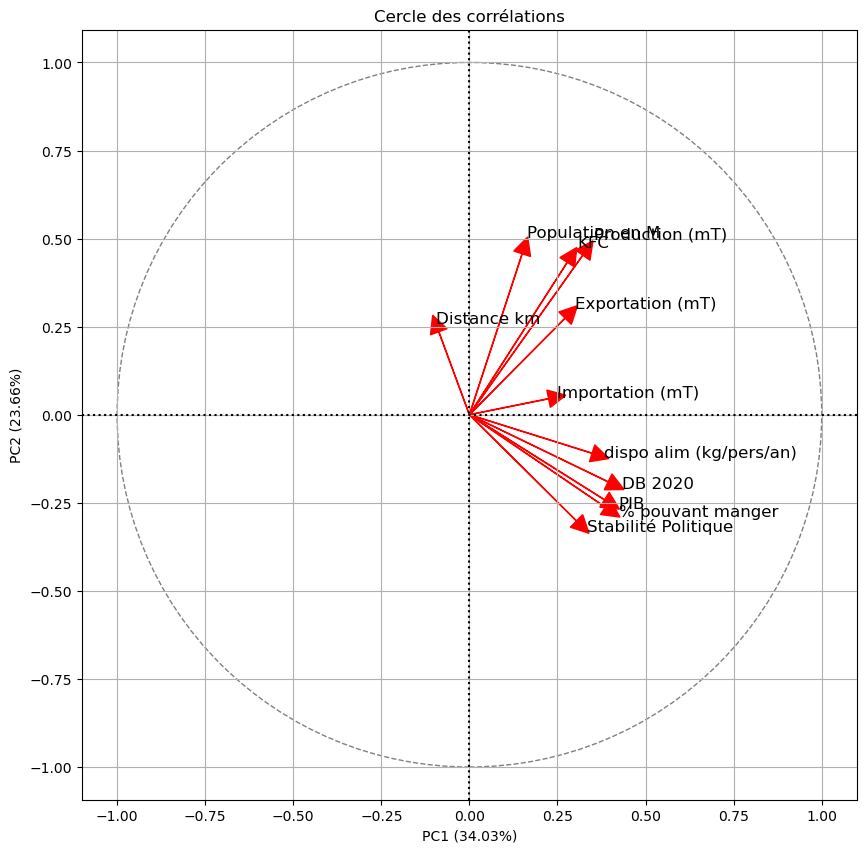

In [114]:
plt.figure(figsize=(10, 10))
circle = plt.Circle((0,0), radius=1, fill=False, color='gray', ls='--')
plt.axhline(y=0, color='k', ls=':')
plt.axvline(x=0, color='k', ls=':')
plt.gca().add_patch(circle)

for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='r', ec='r')
    plt.text(x*1.1, y*1.1, X_scaled.columns[i], fontsize=12)

plt.grid(True)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.title('Cercle des corrélations')
plt.axis('equal')
plt.show()

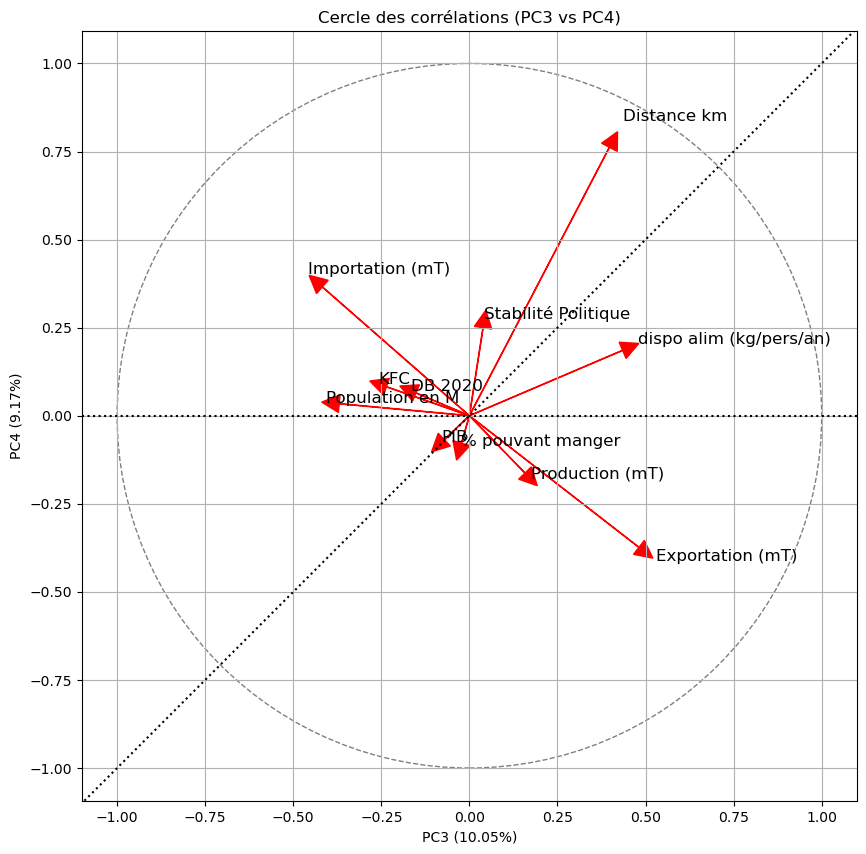

In [115]:
plt.figure(figsize=(10, 10))
circle = plt.Circle((0, 0), radius=1, fill=False, color='gray', ls='--')
plt.gca().add_patch(circle)
plt.axhline(y=0, color='k', ls=':')
plt.axline((0, 0), slope=1, color='k', ls=':')

for i, (x, y) in enumerate(zip(pca.components_[2], pca.components_[3])):  # PC3 et PC4
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='r', ec='r')
    plt.text(x*1.1, y*1.1, X_scaled.columns[i], fontsize=12)

plt.grid(True)
plt.xlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%})')
plt.ylabel(f'PC4 ({pca.explained_variance_ratio_[3]:.2%})')
plt.title('Cercle des corrélations (PC3 vs PC4)')
plt.axis('equal')
plt.show()

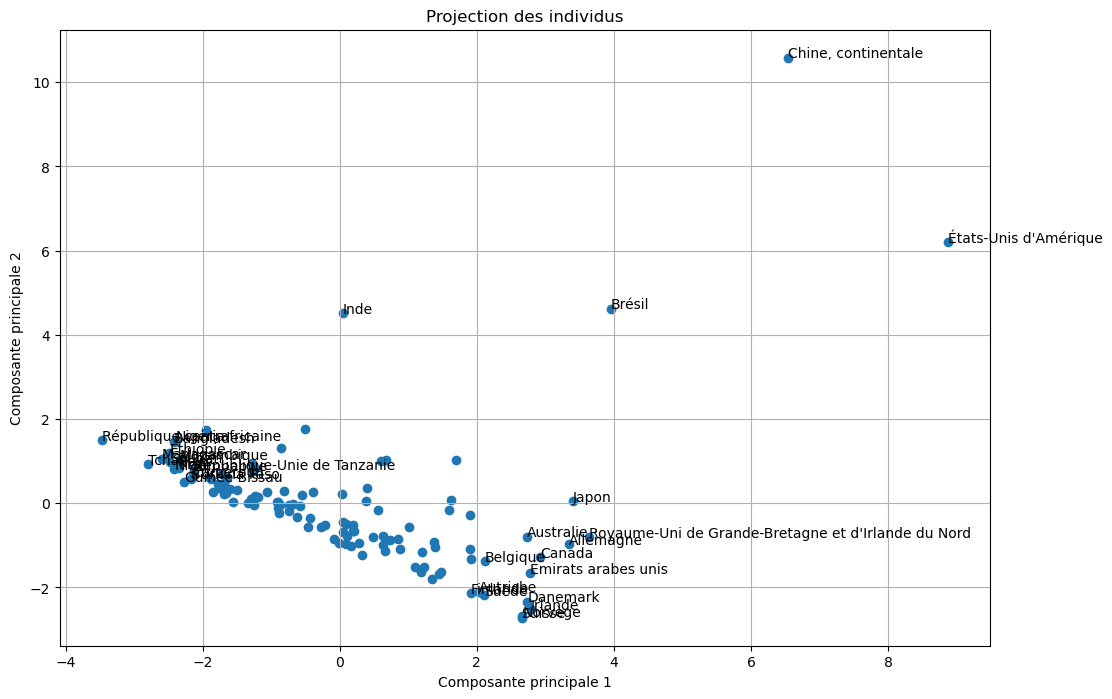

In [116]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel(f'Composante principale 1')
plt.ylabel(f'Composante principale 2')
plt.title('Projection des individus')
for i, txt in enumerate(pays):

    if abs(pca_result[i, 0]) > 2 or abs(pca_result[i, 1]) > 2:
        plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]))
plt.grid(True)
plt.show()

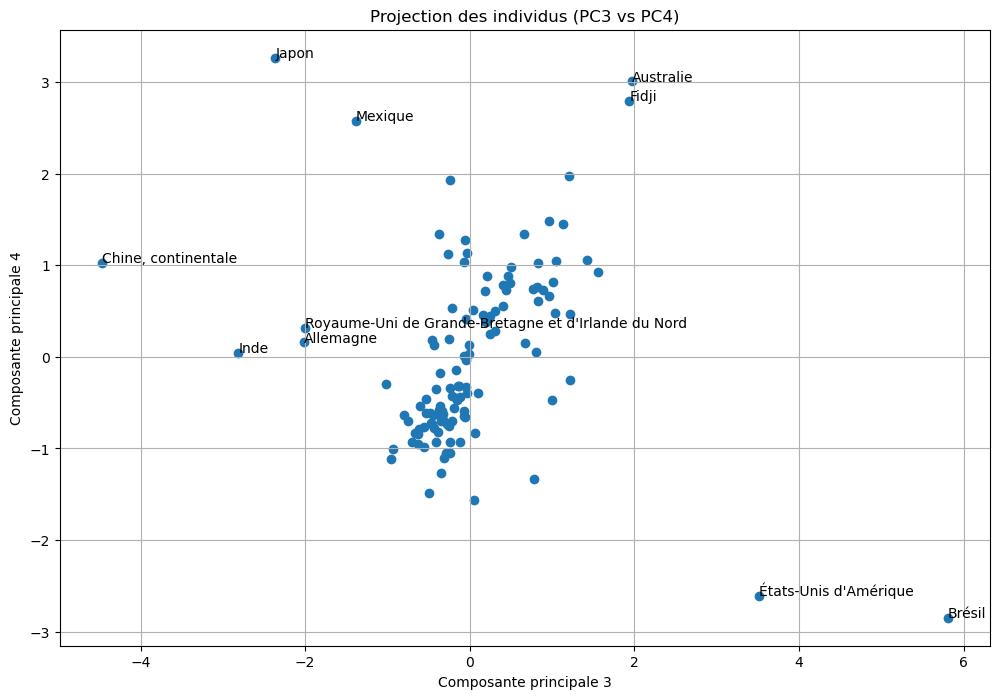

In [117]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 2], pca_result[:, 3])
plt.xlabel(f'Composante principale 3')
plt.ylabel(f'Composante principale 4')
plt.title('Projection des individus (PC3 vs PC4)')

for i, txt in enumerate(pays):
    if abs(pca_result[i, 2]) > 2 or abs(pca_result[i, 3]) > 2:
        plt.annotate(txt, (pca_result[i, 2], pca_result[i, 3]))

plt.grid(True)
plt.show()

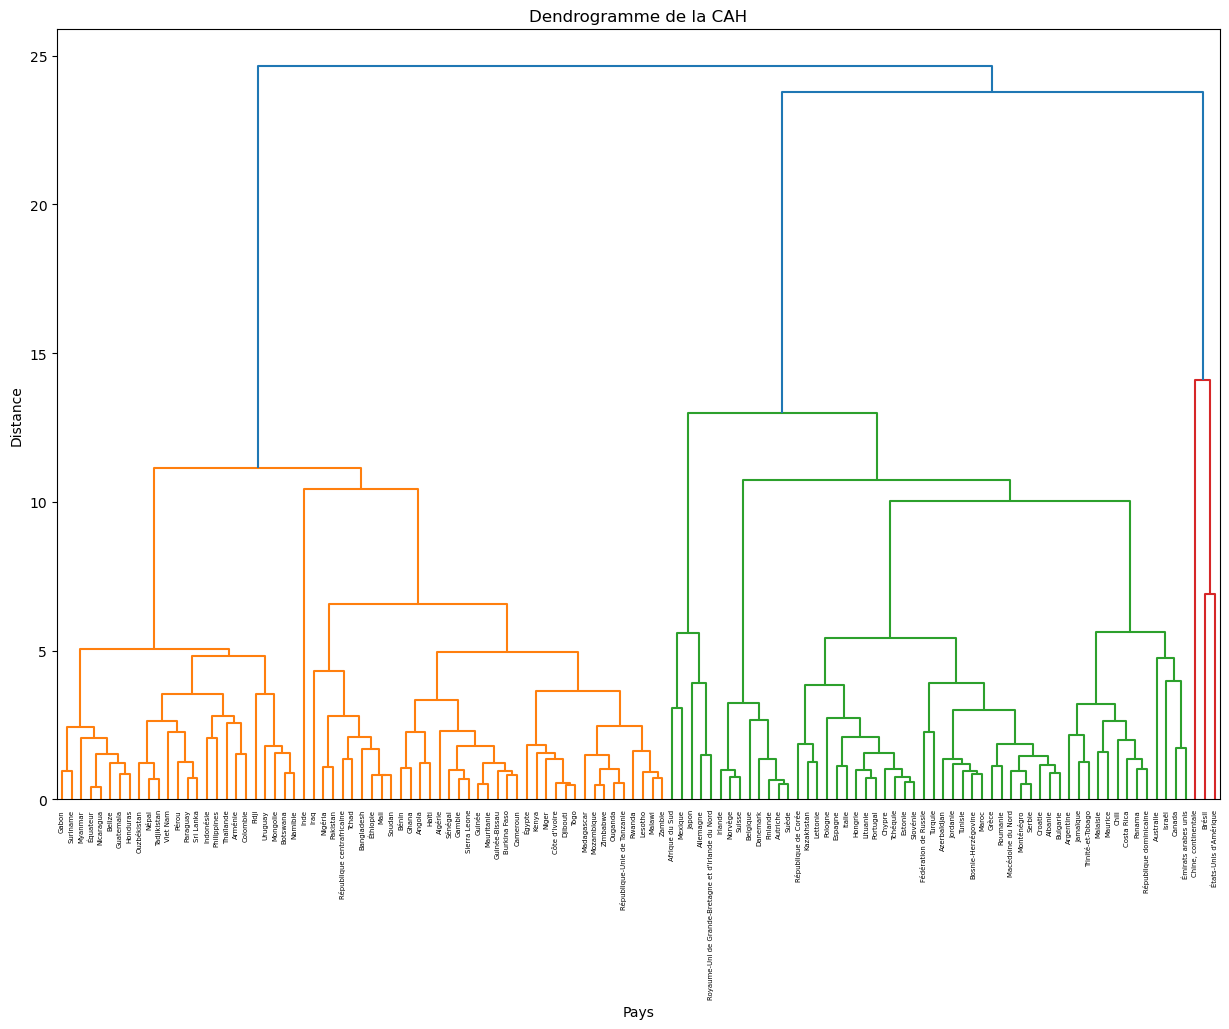

In [118]:
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=pays.values, leaf_rotation=90)
plt.title('Dendrogramme de la CAH')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.show()

C:\Users\maxen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\maxen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\maxen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\maxen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

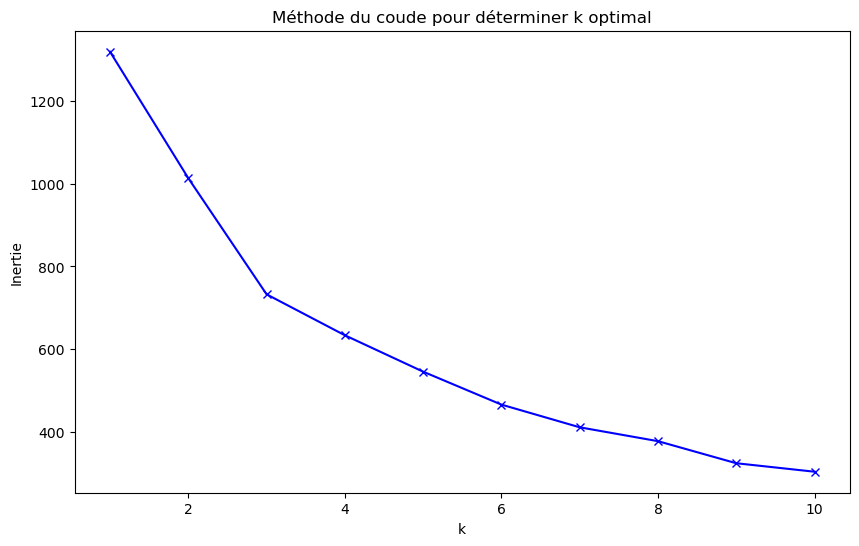

In [119]:
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Visualisation de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer k optimal')
plt.show()

In [120]:
k_optimal = 3  #méthode du coude
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\maxen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\maxen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


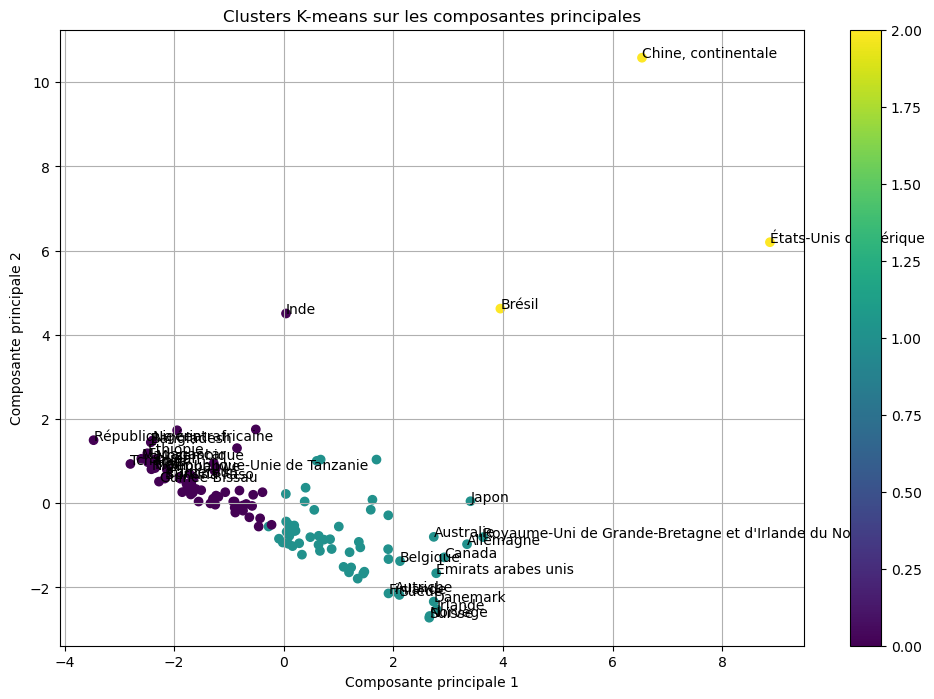

In [121]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Clusters K-means sur les composantes principales')
plt.colorbar(scatter)
for i, txt in enumerate(pays):
    if abs(pca_result[i, 0]) > 2 or abs(pca_result[i, 1]) > 2:
        plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]))
plt.grid(True)
plt.show()

In [122]:
resultats_clusters = pd.DataFrame({
    'Pays': pays,
    'Cluster': clusters
})
print("\nComposition des clusters:")
print(resultats_clusters.groupby('Cluster')['Pays'].apply(list))


Composition des clusters:
Cluster
0    [Algérie, Angola, Arménie, Bangladesh, Belize,...
1    [Afrique du Sud, Albanie, Allemagne, Argentine...
2    [Brésil, Chine, continentale, États-Unis d'Amé...
Name: Pays, dtype: object


In [123]:
df['Cluster'] = clusters
df

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB,KFC,Distance km,Cluster
0,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,38.3,67.0,-0.284804,6618.3,955.0,8665.0,1
1,Albanie,2.884169,16.36,0.0,38.0,13.0,75.7,67.7,0.373771,4531.0,8.0,1599.0,1
2,Algérie,41.389189,6.38,0.0,2.0,275.0,81.4,48.6,-0.919614,4554.7,2.0,1336.0,0
3,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2,79.7,0.574381,45526.6,189.0,877.0,1
4,Angola,29.816766,10.56,0.0,277.0,42.0,36.3,41.3,-0.387895,2437.3,9.0,6485.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Turquie,81.116450,20.64,429.0,3.0,2192.0,88.0,76.8,-1.786376,10695.6,142.0,2593.0,1
118,Uruguay,3.436641,9.12,3.0,3.0,33.0,68.0,61.5,1.040092,19184.7,0.0,10934.0,0
119,Viet Nam,94.600648,12.33,1.0,291.0,918.0,88.8,69.8,0.211102,2956.1,136.0,9178.0,1
120,Zambie,16.853599,3.42,1.0,12.0,49.0,19.3,66.9,0.142043,1483.5,4.0,7575.0,0


C:\Users\maxen\AppData\Local\Temp\ipykernel_12160\2899308841.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", num_clusters)


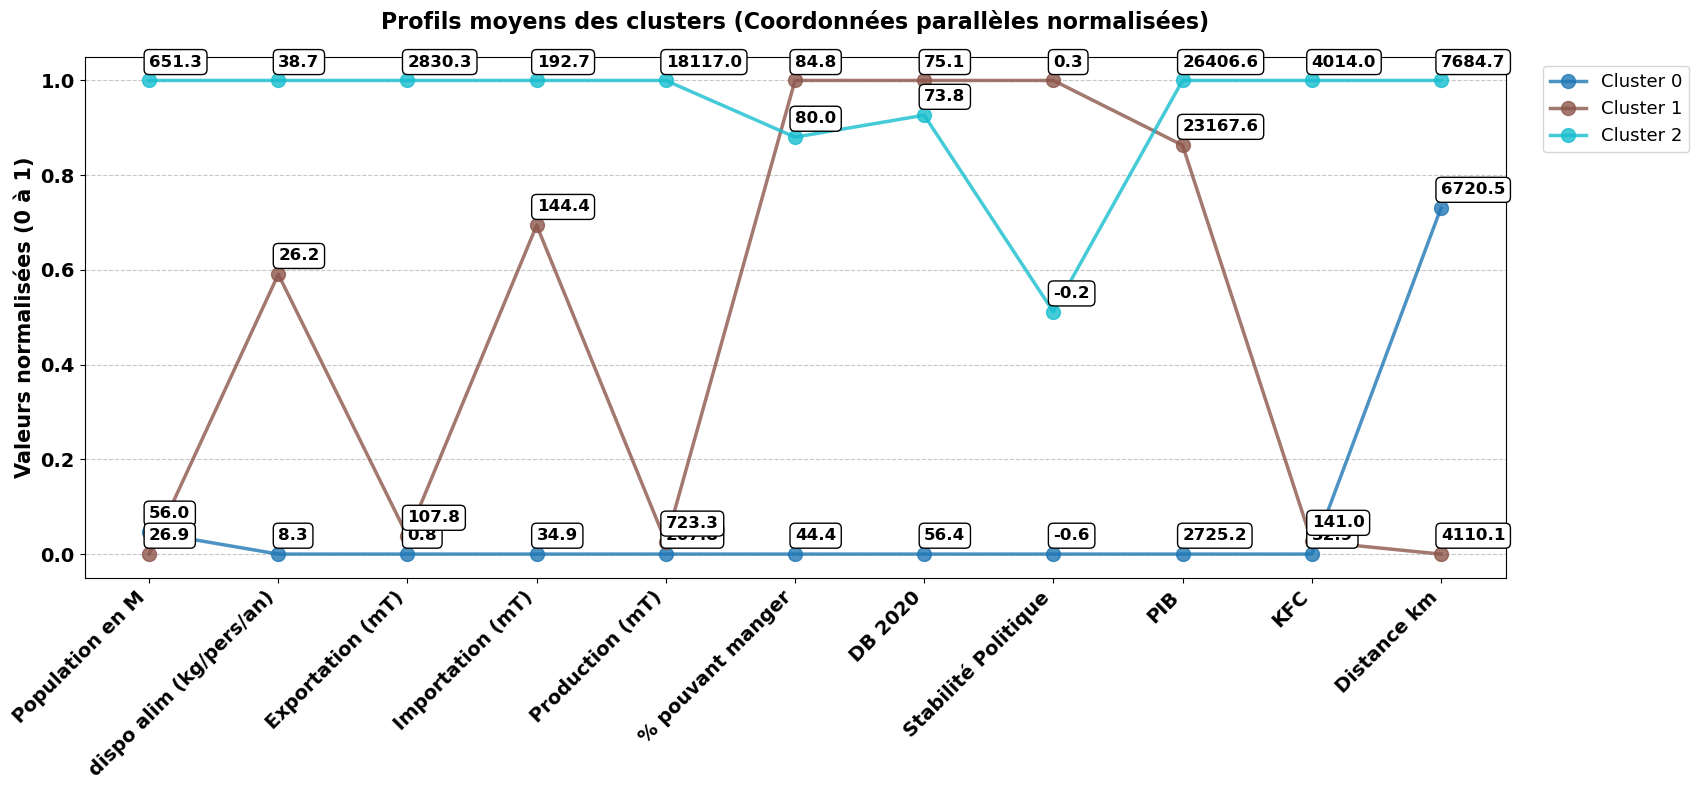

In [124]:
def create_parallel_coordinates(df):
    """
    Crée un graphique en coordonnées parallèles avec normalisation par variable
    et affichage des valeurs en grand format.
    """
    # Sélection des variables
    variables = [
        'Population en M', 'dispo alim (kg/pers/an)', 'Exportation (mT)',
        'Importation (mT)', 'Production (mT)', '% pouvant manger',
        'DB 2020', 'Stabilité Politique', 'PIB', 'KFC', 'Distance km'
    ]

    # Calcul des moyennes par cluster
    cluster_means = df.groupby('Cluster')[variables].mean()

    # Normalisation par variable (Min-Max Scaling sur chaque colonne indépendamment)
    normalized_data = cluster_means.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

    # Création du graphique
    plt.figure(figsize=(18, 8))
    
    # Positions des axes verticaux
    x = np.arange(len(variables))
    
    # Génération des couleurs par cluster
    num_clusters = len(cluster_means.index)
    colors = plt.cm.get_cmap("tab10", num_clusters)

    # Tracer les lignes pour chaque cluster
    for idx, cluster in enumerate(cluster_means.index):
        values = normalized_data.loc[cluster].values
        plt.plot(x, values, '-o', 
                 color=colors(idx), 
                 label=f'Cluster {cluster}',
                 linewidth=2.5, markersize=10, alpha=0.8)

    # Personnalisation des axes et labels
    plt.xticks(x, variables, rotation=45, ha='right', fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Affichage des valeurs réelles à côté des points avec une taille plus grande et un fond blanc
    for idx, cluster in enumerate(cluster_means.index):
        real_values = cluster_means.loc[cluster].values
        norm_values = normalized_data.loc[cluster].values
        
        for j, (norm_v, real_v) in enumerate(zip(norm_values, real_values)):
            plt.annotate(f'{real_v:.1f}', 
                         (x[j], norm_v),
                         xytext=(0, 10), textcoords='offset points',
                         fontsize=12, fontweight='bold', color='black',
                         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Personnalisation supplémentaire
    plt.ylabel('Valeurs normalisées (0 à 1)', fontsize=15, fontweight='bold')
    plt.title('Profils moyens des clusters (Coordonnées parallèles normalisées)', pad=20, fontsize=16, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=13)

    # Ajustement des marges pour éviter le chevauchement
    plt.tight_layout(rect=[0, 0, 0.95, 1])

    return plt.gcf()

# Création et affichage du graphique
fig = create_parallel_coordinates(df)
plt.show()

In [125]:
pays_cluster = df[df['Cluster'] == 1].reset_index(drop=True)
pays_cluster

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB,KFC,Distance km,Cluster
0,Afrique du Sud,57.009756,35.69,63.0,514.0,1667.0,38.3,67.0,-0.284804,6618.3,955.0,8665.0,1
1,Albanie,2.884169,16.36,0.0,38.0,13.0,75.7,67.7,0.373771,4531.0,8.0,1599.0,1
2,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2,79.7,0.574381,45526.6,189.0,877.0,1
3,Argentine,43.937140,42.24,207.0,8.0,2161.0,91.4,59.0,0.162542,14532.5,0.0,3423.0,1
4,Australie,24.584620,47.65,42.0,16.0,1269.0,97.2,81.2,0.876064,53901.7,653.0,16881.0,1
5,Autriche,8.819901,18.20,78.0,110.0,148.0,97.7,78.7,1.029625,47163.7,11.0,1031.0,1
6,Azerbaïdjan,9.845320,13.11,0.0,27.0,104.0,99.0,76.7,-0.751901,4147.2,11.0,3805.0,1
7,Belgique,11.419748,12.65,656.0,338.0,463.0,98.2,75.0,0.417607,44035.3,15.0,261.0,1
8,Bosnie-Herzégovine,3.351525,16.70,8.0,10.0,61.0,94.0,65.4,-0.351470,5345.0,0.0,1347.0,1
9,Bulgarie,7.102444,22.06,45.0,108.0,107.0,90.1,72.0,0.321380,8381.9,28.0,1755.0,1


In [126]:
pays_cluster = df[
    (df['Stabilité Politique'] > 0) & 
    (df['Distance km'] < 1500) & 
    (df['% pouvant manger'] > 90) &
    (df['Cluster'] == 1)
]
pays_cluster

,Zone,Population en M,dispo alim (kg/pers/an),Exportation (mT),Importation (mT),Production (mT),% pouvant manger,DB 2020,Stabilité Politique,PIB,KFC,Distance km,Cluster
3,Allemagne,82.658409,19.47,646.0,842.0,1514.0,97.2,79.7,0.574381,45526.6,189.0,877.0,1
8,Autriche,8.819901,18.20,78.0,110.0,148.0,97.7,78.7,1.029625,47163.7,11.0,1031.0,1
11,Belgique,11.419748,12.65,656.0,338.0,463.0,98.2,75.0,0.417607,44035.3,15.0,261.0,1
28,Danemark,5.732274,28.98,139.0,133.0,173.0,98.3,85.3,0.854938,57521.6,10.0,1024.0,1
55,Irlande,4.753279,25.82,93.0,99.0,110.0,97.9,79.6,0.993410,72499.3,40.0,776.0,1
84,Norvège,5.296326,19.05,0.0,2.0,101.0,98.1,82.6,1.150702,76131.8,0.0,1338.0,1
99,Royaume-Uni de Grande-Bretagne et d'Irlande du...,66.727461,31.94,359.0,779.0,1814.0,96.7,83.5,0.380680,40572.1,909.0,342.0,1
104,Slovénie,2.076394,24.41,29.0,20.0,72.0,95.2,76.5,0.866365,23303.1,1.0,964.0,1
108,Suisse,8.455804,15.72,4.0,51.0,91.0,98.8,76.6,1.242316,82254.4,11.0,435.0,1
112,Tchéquie,10.641034,21.96,27.0,116.0,163.0,95.3,76.3,0.990651,20913.2,114.0,882.0,1
